In [1]:
# Import necessary libraries
import pandas as pd
from pathlib import Path
from IPython.display import display

# Load the CSV file using proper Windows path handling
file_path = Path(r"E:\vulnerability_assessment_data (3).csv")
df = pd.read_csv(file_path)

# Convert date columns to datetime, handling errors as NaT
df['Discovered Date'] = pd.to_datetime(df['Discovered Date'], errors='coerce')
df['Patch Date'] = pd.to_datetime(df['Patch Date'], errors='coerce')

# Create additional features
df['Description Length'] = df['Description'].apply(lambda x: len(str(x)))  # Handle possible NaN
df['Days to Patch'] = (df['Patch Date'] - df['Discovered Date']).dt.days

# Handle negative 'Days to Patch' values (convert to absolute value)
df['Days to Patch'] = df['Days to Patch'].apply(lambda x: abs(x) if pd.notnull(x) and x < 0 else x)

# Replace infinite values and drop rows with any missing values
df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
df.dropna(inplace=True)

# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = Path("cleaned_vulnerability_data.csv")
df.to_csv(cleaned_file_path, index=False)
print(f" Cleaned data saved to: {cleaned_file_path.resolve()}")

# Set pandas display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
print("🧾 Final Columns:", df.columns.tolist())

# Display the cleaned DataFrame
display(df)


 Cleaned data saved to: C:\Users\Malli\OneDrive\Documents\OneDrive\Desktop\CYBER\cleaned_vulnerability_data.csv
🧾 Final Columns: ['ID', 'Description', 'Severity', 'Vulnerability Type', 'Affected Software', 'Discovered Date', 'Patch Date', 'Risk Score', 'Description Length', 'Days to Patch']


,ID,Description,Severity,Vulnerability Type,Affected Software,Discovered Date,Patch Date,Risk Score,Description Length,Days to Patch
0,1,Vulnerability description 1,Medium,XSS,Software A,2023-05-31 04:25:56.390365,2024-05-03 04:25:56.390927,5,27,338
1,2,Vulnerability description 2,Low,CSRF,Software C,2024-04-10 04:25:56.390385,2023-06-09 04:25:56.390936,2,27,306
2,3,Vulnerability description 3,Medium,Buffer Overflow,Software B,2023-09-19 04:25:56.390393,2023-06-22 04:25:56.390941,10,27,89
3,4,Vulnerability description 4,High,CSRF,Software B,2024-03-08 04:25:56.390399,2023-12-20 04:25:56.390946,5,27,79
4,5,Vulnerability description 5,Low,CSRF,Software C,2024-04-09 04:25:56.390404,2023-10-17 04:25:56.390951,4,27,175
5,6,Vulnerability description 6,Critical,SQL Injection,Software B,2024-03-12 04:25:56.390410,2023-05-30 04:25:56.390955,3,27,287
6,7,Vulnerability description 7,Low,Buffer Overflow,Software B,2023-09-27 04:25:56.390415,2023-06-01 04:25:56.390960,8,27,118
7,8,Vulnerability description 8,High,SQL Injection,Software C,2023-10-18 04:25:56.390420,2023-11-04 04:25:56.390965,5,27,17
8,9,Vulnerability description 9,Critical,SQL Injection,Software A,2024-02-03 04:25:56.390425,2023-08-31 04:25:56.390970,4,27,156
9,10,Vulnerability description 10,High,XSS,Software B,2024-03-21 04:25:56.390445,2023-10-19 04:25:56.390975,6,28,154


In [3]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Checking the column data types
print("\nColumn data types:\n", df.dtypes)

# Converting 'Discovered Date' and 'Patch Date' to datetime format
for col in ["Discovered Date", "Patch Date"]:
    if col in df.columns:  # Check if column exists to avoid KeyError
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Check and fix negative values in 'Days to Patch'
if "Days to Patch" in df.columns:
    df["Days to Patch"] = df["Days to Patch"].apply(lambda x: abs(x) if pd.notnull(x) and x < 0 else x)

# Display summary after preprocessing
print("\nDataFrame info:")
df.info()
print("\nData preview:")
print(df.head())


Missing values:
 ID                    0
Description           0
Severity              0
Vulnerability Type    0
Affected Software     0
Discovered Date       0
Patch Date            0
Risk Score            0
Description Length    0
Days to Patch         0
dtype: int64

Column data types:
 ID                             int64
Description                   object
Severity                      object
Vulnerability Type            object
Affected Software             object
Discovered Date       datetime64[ns]
Patch Date            datetime64[ns]
Risk Score                     int64
Description Length             int64
Days to Patch                  int64
dtype: object

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  100 non-null    int64         
 1   Description         100 non-nul

In [4]:
# Drop date columns if they exist
cols_to_drop = ["Discovered Date", "Patch Date"]
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns], errors="ignore")

# Encode Severity (if not already encoded)
severity_mapping = {"Low": 1, "Medium": 2, "High": 3}
if df["Severity"].dtype == "object":   # Only encode if it's text
    df["Severity"] = df["Severity"].map(severity_mapping)

# One-hot encoding categorical features (only if original columns exist)
for col in ["Vulnerability Type", "Affected Software"]:
    if col in df.columns:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

# Display cleaned dataset
print(df.head())



   ID                  Description  Severity  Risk Score  Description Length  \
0   1  Vulnerability description 1       2.0           5                  27   
1   2  Vulnerability description 2       1.0           2                  27   
2   3  Vulnerability description 3       2.0          10                  27   
3   4  Vulnerability description 4       3.0           5                  27   
4   5  Vulnerability description 5       1.0           4                  27   

   Days to Patch  Vulnerability Type_CSRF  Vulnerability Type_SQL Injection  \
0            338                    False                             False   
1            306                     True                             False   
2             89                    False                             False   
3             79                     True                             False   
4            175                     True                             False   

   Vulnerability Type_XSS  Affected Software

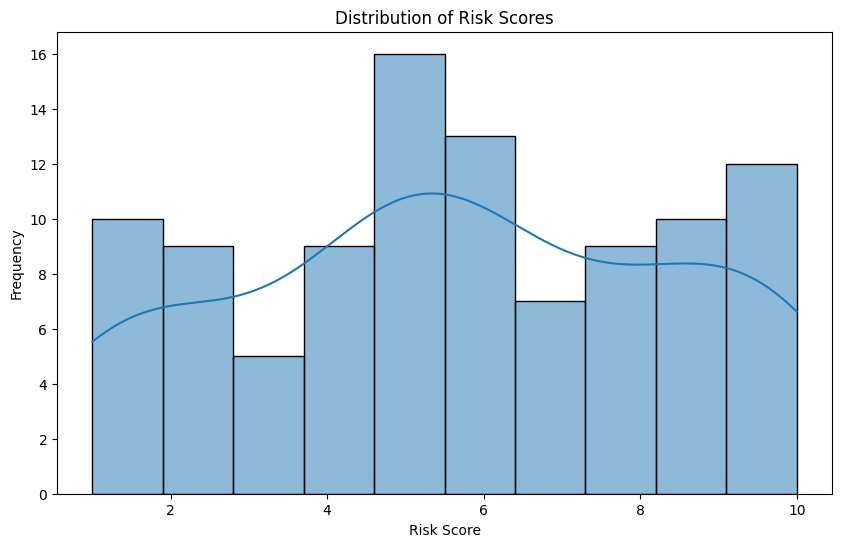

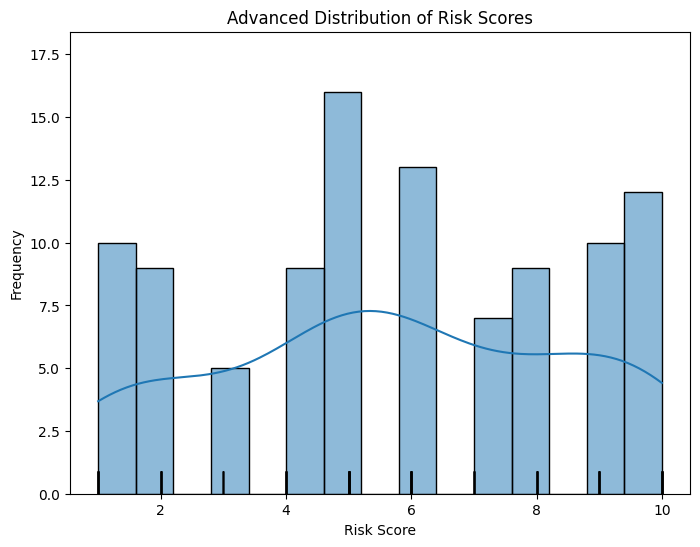

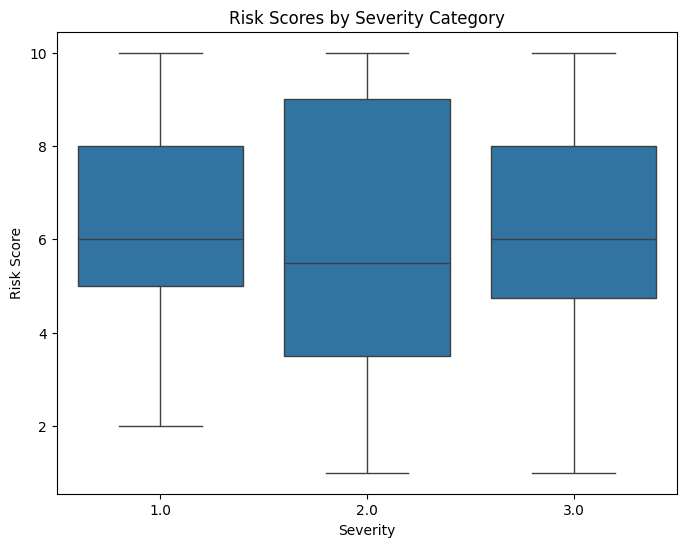

In [12]:
# First distribution plot
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.figure(figsize=(10, 6))
sns.histplot(df['Risk Score'], bins=10, kde=True)
plt.title('Distribution of Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.savefig('distribution_of_risk_scores.png')
plt.show()

# Advanced distribution plot
plt.figure(figsize=(8, 6))   # <--- start a new figure
sns.histplot(df['Risk Score'], bins=15, kde=True)
sns.rugplot(df['Risk Score'], height=0.05, color='black')
plt.title('Advanced Distribution of Risk Scores')
plt.xlabel('Risk Score')
plt.ylabel('Frequency')
plt.savefig('advanced_distribution_risk_score.png')
plt.show()

# Severity boxplot
if 'Severity' in df.columns:
    plt.figure(figsize=(8, 6))   # <--- new figure again
    sns.boxplot(data=df, x='Severity', y='Risk Score')
    plt.title('Risk Scores by Severity Category')
    plt.savefig('risk_score_by_severity.png')
    plt.show()





Unique Severity raw values: ['medium' 'low' 'high' 'critical']
Unique Severity labels: ['Medium' 'Low' 'High']
   Severity  Severity_Num Severity_Label
0    medium             2         Medium
1       low             1            Low
2    medium             2         Medium
3      high             3           High
4       low             1            Low
5  critical             3           High
6       low             1            Low
7      high             3           High
8  critical             3           High
9      high             3           High


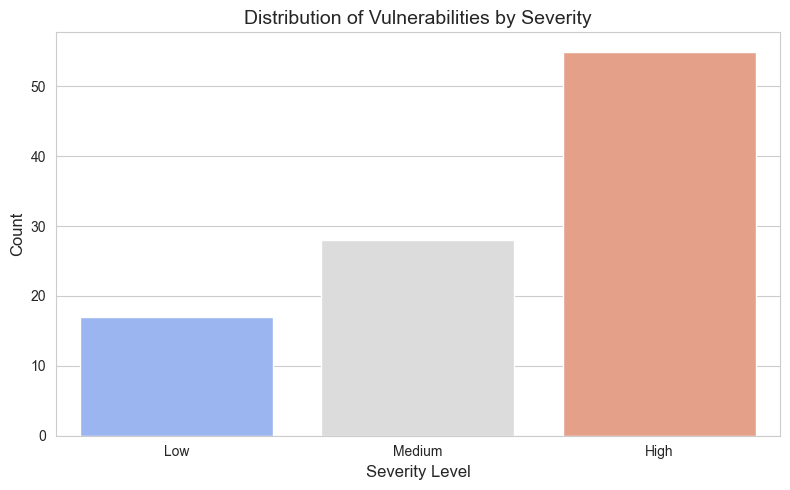

In [3]:
# Libraries 
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# Load cleaned data
df = pd.read_csv("cleaned_vulnerability_data.csv")

# Make severity lowercase for consistent mapping
if df["Severity"].dtype == "object":
    df["Severity"] = df["Severity"].str.strip().str.lower()

# Map to numeric (Critical → High = 3),
severity_mapping = {
    "low": 1,
    "medium": 2,
    "high": 3,
    "critical": 3
}
df["Severity_Num"] = df["Severity"].map(severity_mapping)

# Reverse mapping for labels
severity_reverse = {1: "Low", 2: "Medium", 3: "High"}
df["Severity_Label"] = df["Severity_Num"].map(severity_reverse)

# Debug check 
print("Unique Severity raw values:", df["Severity"].unique())
print("Unique Severity labels:", df["Severity_Label"].unique())
print(df[["Severity", "Severity_Num", "Severity_Label"]].head(10))

# Plot Distribution
plt.figure(figsize=(8, 5))
sns.countplot(
    x="Severity_Label",
    data=df,
    order=["Low", "Medium", "High"],
    palette="coolwarm"
)

plt.title("Distribution of Vulnerabilities by Severity", fontsize=14)
plt.xlabel("Severity Level", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.tight_layout()
plt.show()

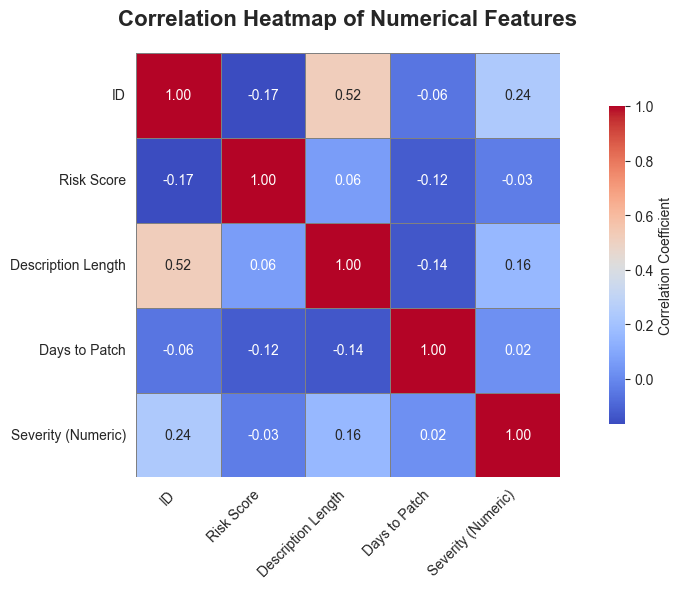

In [28]:
# Import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure Description Length column exists
if 'Description Length' not in df.columns:
    df['Description Length'] = df['Description'].apply(lambda x: len(str(x)))

# Convert 'Severity' to numeric for correlation purposes (if not already converted)
severity_map = {'Low': 0, 'Medium': 1, 'High': 2}
if df['Severity'].dtype == 'object':
    df['Severity (Numeric)'] = df['Severity'].map(severity_map)
else:
    df['Severity (Numeric)'] = df['Severity']

# Select only numeric columns for correlation analysis
numeric_features_df = df.select_dtypes(include=["number"])

# Compute the correlation matrix using Pearson method
correlation_matrix = numeric_features_df.corr(method='pearson')

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    linecolor='gray',
    square=True,
    cbar_kws={"shrink": 0.75, "label": "Correlation Coefficient"}
)

# Add a clean and formal title and axis formatting
plt.title("Correlation Heatmap of Numerical Features", fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()



 Unique Severities: ['Medium' 'Low' 'High' 'Critical']
 Severity Distribution:
 Severity_Label
Medium      28
High        28
Critical    27
Low         17
Name: count, dtype: int64

 Dataset Shape: (100, 4) (100,)

 After SMOTE balancing:
Severity_Num
1    28
0    28
2    28
3    28
Name: count, dtype: int64

 Logistic Regression Accuracy: 0.22

 Classification Report:
               precision    recall  f1-score   support

         Low       0.50      0.50      0.50         6
      Medium       0.00      0.00      0.00         5
        High       0.14      0.17      0.15         6
    Critical       0.17      0.17      0.17         6

    accuracy                           0.22        23
   macro avg       0.20      0.21      0.21        23
weighted avg       0.21      0.22      0.21        23



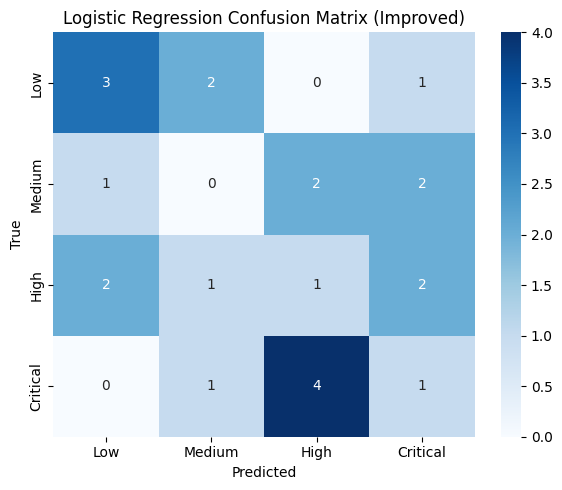

In [7]:

# Auto-install imbalanced-learn if not present
import sys
import subprocess

try:
    from imblearn.over_sampling import SMOTE
except ModuleNotFoundError:
    print(" Installing 'imbalanced-learn' ...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", "imbalanced-learn"])
    from imblearn.over_sampling import SMOTE

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Load and Prepare Data

df = pd.read_csv(r"E:\vulnerability_assessment_data (3).csv")

# Clean and standardize severity
df["Severity_Label"] = df["Severity"].astype(str).str.strip().str.title()

# Map severity text to numbers
severity_map = {"Low": 0, "Medium": 1, "High": 2, "Critical": 3}
df["Severity_Num"] = df["Severity_Label"].map(severity_map)
df = df.dropna(subset=["Severity_Num"])

print(" Unique Severities:", df["Severity_Label"].unique())
print(" Severity Distribution:\n", df["Severity_Label"].value_counts())

# Select numeric features
X = df.select_dtypes(include=["number"]).drop(columns=["Severity_Num"], errors="ignore")
y = df["Severity_Num"]

print("\n Dataset Shape:", X.shape, y.shape)

# Feature Scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Handle Class Imbalance (SMOTE)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

print("\n After SMOTE balancing:")
print(pd.Series(y_res).value_counts())

# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# Train Logistic Regression Model

log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42,
    C=10,                 # Less regularization (more flexible)
    class_weight='balanced'  # Handle any remaining imbalance
)
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate the Model
acc = accuracy_score(y_test, y_pred)
print(f"\n Logistic Regression Accuracy: {acc:.2f}")
print("\n Classification Report:\n", classification_report(
    y_test, y_pred, target_names=severity_map.keys()))

# Confusion Matrix Visualization

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt="d", cmap="Blues",
            xticklabels=severity_map.keys(),
            yticklabels=severity_map.keys())
plt.title("Logistic Regression Confusion Matrix (Improved)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()


K=1 ➜ Accuracy = 0.35
K=2 ➜ Accuracy = 0.39
K=3 ➜ Accuracy = 0.35
K=4 ➜ Accuracy = 0.26
K=5 ➜ Accuracy = 0.30
K=6 ➜ Accuracy = 0.30
K=7 ➜ Accuracy = 0.30
K=8 ➜ Accuracy = 0.30
K=9 ➜ Accuracy = 0.30
K=10 ➜ Accuracy = 0.30
K=11 ➜ Accuracy = 0.30
K=12 ➜ Accuracy = 0.30
K=13 ➜ Accuracy = 0.30
K=14 ➜ Accuracy = 0.30
K=15 ➜ Accuracy = 0.30
K=16 ➜ Accuracy = 0.30
K=17 ➜ Accuracy = 0.30
K=18 ➜ Accuracy = 0.30
K=19 ➜ Accuracy = 0.30
K=20 ➜ Accuracy = 0.30
K=21 ➜ Accuracy = 0.30
K=22 ➜ Accuracy = 0.30
K=23 ➜ Accuracy = 0.30
K=24 ➜ Accuracy = 0.30
K=25 ➜ Accuracy = 0.30
K=26 ➜ Accuracy = 0.30
K=27 ➜ Accuracy = 0.30
K=28 ➜ Accuracy = 0.30
K=29 ➜ Accuracy = 0.30
K=30 ➜ Accuracy = 0.30
K=31 ➜ Accuracy = 0.30
K=32 ➜ Accuracy = 0.30
K=33 ➜ Accuracy = 0.30
K=34 ➜ Accuracy = 0.30
K=35 ➜ Accuracy = 0.30
K=36 ➜ Accuracy = 0.30
K=37 ➜ Accuracy = 0.30
K=38 ➜ Accuracy = 0.30
K=39 ➜ Accuracy = 0.30
K=40 ➜ Accuracy = 0.30

 Best K = 2 with Accuracy = 0.39
 Cross-Validation Accuracy: 0.34

 Final KNN Accuracy (

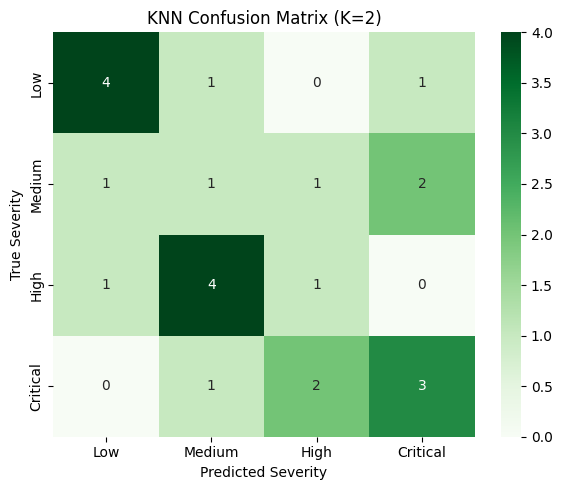

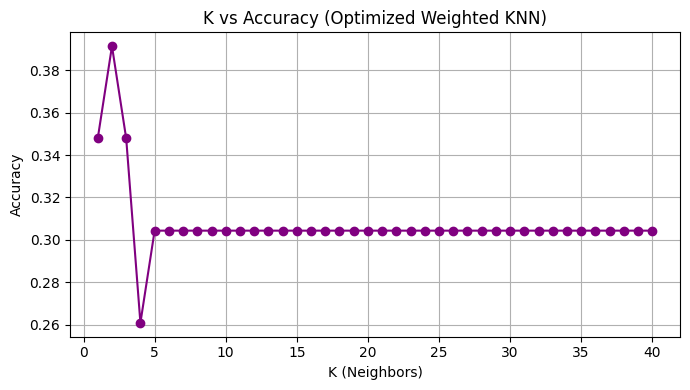

In [46]:

# Install imblearn if missing
import sys, subprocess
try:
    from imblearn.over_sampling import SMOTE
except ModuleNotFoundError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "imbalanced-learn"])
    from imblearn.over_sampling import SMOTE

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# =====================================================
# Load Data
# =====================================================
df = pd.read_csv(r"E:\vulnerability_assessment_data (3).csv")

# Clean severity labels
df["Severity_Label"] = df["Severity"].astype(str).str.strip().str.title()
severity_map = {"Low": 0, "Medium": 1, "High": 2, "Critical": 3}
df["Severity_Num"] = df["Severity_Label"].map(severity_map)
df = df.dropna(subset=["Severity_Num"])

# =====================================================
# Feature Engineering (Simplified & Safe)
# =====================================================
df["Risk Score"] = pd.to_numeric(df["Risk Score"], errors="coerce").clip(lower=0)
df["Days to Patch"] = pd.to_numeric(df["Days to Patch"], errors="coerce").clip(lower=0)
df["Description Length"] = df["Description"].astype(str).apply(len)
df["Risk_per_Day"] = df["Risk Score"] / (df["Days to Patch"] + 1)

# Replace inf/nan with 0
df = df.replace([np.inf, -np.inf], np.nan).fillna(0)

# Select features
X = df[["Risk Score", "Days to Patch", "Description Length", "Risk_per_Day"]]
y = df["Severity_Num"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Balance Classes (SMOTE)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)


# Split Data for RFM

X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)


# Tune for Best K

accuracies = []
for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append((k, acc))
    print(f"K={k} ➜ Accuracy = {acc:.2f}")

best_k, best_acc = max(accuracies, key=lambda x: x[1])
print(f"\n Best K = {best_k} with Accuracy = {best_acc:.2f}")

# Final Model with Cross-Validation

knn_best = KNeighborsClassifier(n_neighbors=best_k, weights='distance', metric='manhattan')
cv_scores = cross_val_score(knn_best, X_res, y_res, cv=5)
print(f" Cross-Validation Accuracy: {cv_scores.mean():.2f}")

knn_best.fit(X_train, y_train)
y_pred_best = knn_best.predict(X_test)

print(f"\n Final KNN Accuracy (K={best_k}): {accuracy_score(y_test, y_pred_best):.2f}")
print("\n Classification Report:\n", classification_report(
    y_test, y_pred_best, target_names=severity_map.keys()))

#  Confusion Matrix

plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_best),
            annot=True, fmt="d", cmap="Greens",
            xticklabels=severity_map.keys(),
            yticklabels=severity_map.keys())
plt.title(f"KNN Confusion Matrix (K={best_k})")
plt.xlabel("Predicted Severity")
plt.ylabel("True Severity")
plt.tight_layout()
plt.show()

# K vs Accuracy Graph

k_values = [k for k, _ in accuracies]
acc_values = [acc for _, acc in accuracies]
plt.figure(figsize=(7, 4))
plt.plot(k_values, acc_values, marker='o', color='purple')
plt.title("K vs Accuracy (Optimized Weighted KNN)")
plt.xlabel("K (Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

 Best K = 2 with Accuracy = 0.39


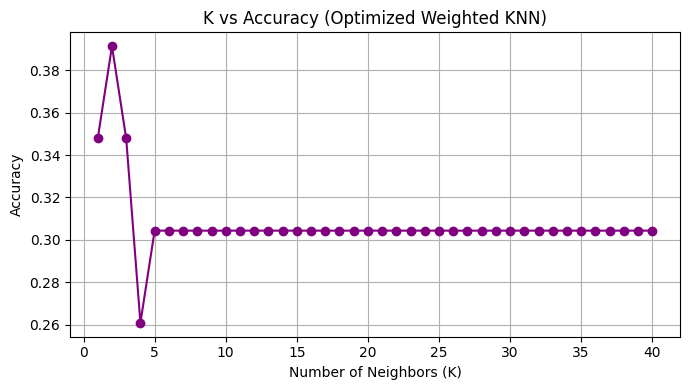

 Cross-Validation Accuracy: 0.34

 Final KNN Accuracy (K=2): 0.39
              precision    recall  f1-score   support

         Low       0.67      0.67      0.67         6
      Medium       0.14      0.20      0.17         5
        High       0.25      0.17      0.20         6
    Critical       0.50      0.50      0.50         6

    accuracy                           0.39        23
   macro avg       0.39      0.38      0.38        23
weighted avg       0.40      0.39      0.39        23


 Logistic Regression Accuracy: 0.22
              precision    recall  f1-score   support

         Low       0.50      0.17      0.25         6
      Medium       0.18      0.40      0.25         5
        High       0.25      0.33      0.29         6
    Critical       0.00      0.00      0.00         6

    accuracy                           0.22        23
   macro avg       0.23      0.22      0.20        23
weighted avg       0.24      0.22      0.19        23



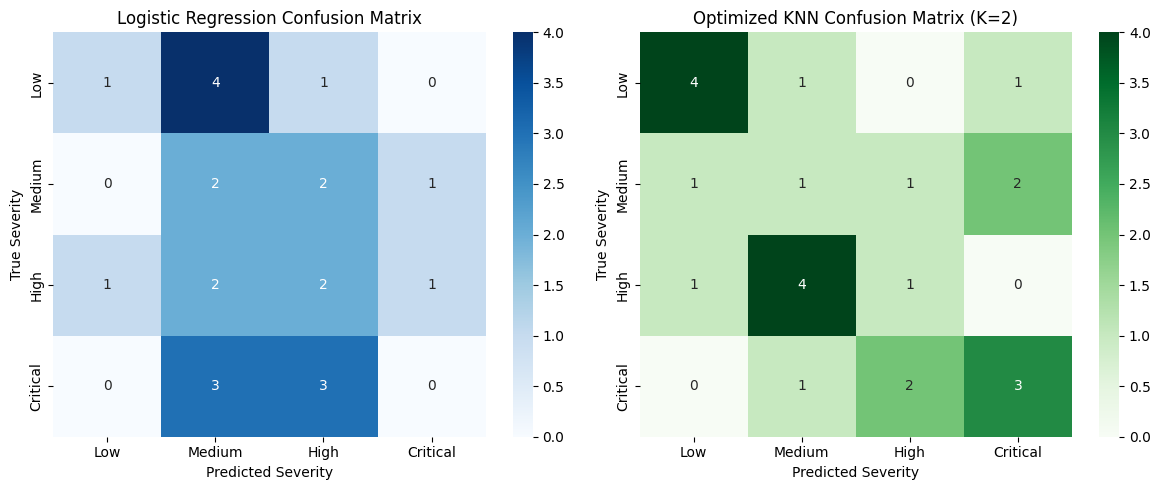

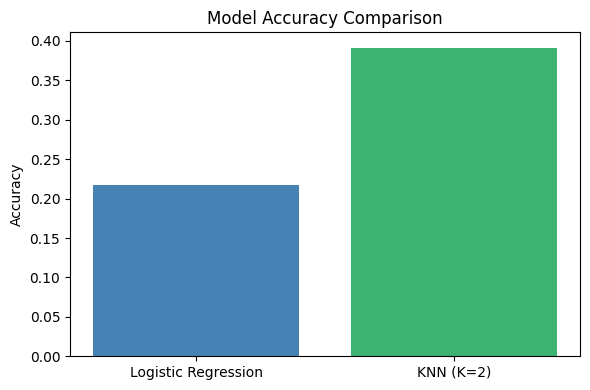


 Model Accuracy Comparison:
 Logistic Regression: 0.22
 Optimized KNN (K=2): 0.39


In [11]:

import sys, subprocess
try:
    from imblearn.over_sampling import SMOTE
except ModuleNotFoundError:
    subprocess.check_call([sys.executable, "-m", "pip", "install", "imbalanced-learn"])
    from imblearn.over_sampling import SMOTE

# importing liberiers
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# Loading Data
df = pd.read_csv(r"E:\vulnerability_assessment_data (3).csv")

# Clean severity labels
df["Severity_Label"] = df["Severity"].astype(str).str.strip().str.title()
severity_map = {"Low": 0, "Medium": 1, "High": 2, "Critical": 3}
df["Severity_Num"] = df["Severity_Label"].map(severity_map)
df = df.dropna(subset=["Severity_Num"])

# features
df["Risk Score"] = pd.to_numeric(df["Risk Score"], errors="coerce").clip(lower=0)
df["Days to Patch"] = pd.to_numeric(df["Days to Patch"], errors="coerce").clip(lower=0)
df["Description Length"] = df["Description"].astype(str).apply(len)
df["Risk_per_Day"] = df["Risk Score"] / (df["Days to Patch"] + 1)
df = df.replace([np.inf, -np.inf], np.nan).fillna(0)

# Target & features
X = df[["Risk Score", "Days to Patch", "Description Length", "Risk_per_Day"]]
y = df["Severity_Num"]

# Scale and balance

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

# =====================================================
# Knn- Hypermetric Tunning
accuracies = []
for k in range(1, 41):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', metric='manhattan')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append((k, acc))

best_k, best_acc = max(accuracies, key=lambda x: x[1])
print(f" Best K = {best_k} with Accuracy = {best_acc:.2f}")

# K vs Accuracy Plot
k_values = [k for k, _ in accuracies]
acc_values = [acc for _, acc in accuracies]
plt.figure(figsize=(7, 4))
plt.plot(k_values, acc_values, marker='o', color='purple')
plt.title("K vs Accuracy (Optimized Weighted KNN)")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.tight_layout()
plt.show()

# Final Optimized KNN Model
knn_best = KNeighborsClassifier(n_neighbors=best_k, weights='distance', metric='manhattan')
cv_scores = cross_val_score(knn_best, X_res, y_res, cv=5)
print(f" Cross-Validation Accuracy: {cv_scores.mean():.2f}")

knn_best.fit(X_train, y_train)
y_pred_knn = knn_best.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)

print(f"\n Final KNN Accuracy (K={best_k}): {acc_knn:.2f}")
print(classification_report(y_test, y_pred_knn, target_names=severity_map.keys()))

# Logestic Reggression
log_reg = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
acc_log = accuracy_score(y_test, y_pred_log)

print(f"\n Logistic Regression Accuracy: {acc_log:.2f}")
print(classification_report(y_test, y_pred_log, target_names=severity_map.keys()))

# Confesion Matrix visiliation comperation
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_log = confusion_matrix(y_test, y_pred_log)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues",
            xticklabels=severity_map.keys(), yticklabels=severity_map.keys(), ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")
axes[0].set_xlabel("Predicted Severity")
axes[0].set_ylabel("True Severity")

sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Greens",
            xticklabels=severity_map.keys(), yticklabels=severity_map.keys(), ax=axes[1])
axes[1].set_title(f"Optimized KNN Confusion Matrix (K={best_k})")
axes[1].set_xlabel("Predicted Severity")
axes[1].set_ylabel("True Severity")

plt.tight_layout()
plt.show()
# Bar Chart Accuraccy
plt.figure(figsize=(6,4))
plt.bar(["Logistic Regression", f"KNN (K={best_k})"],
        [acc_log, acc_knn],
        color=["steelblue", "mediumseagreen"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()
# Output Summery
print("\n Model Accuracy Comparison:")
print(f" Logistic Regression: {acc_log:.2f}")
print(f" Optimized KNN (K={best_k}): {acc_knn:.2f}")
